<a href="https://colab.research.google.com/github/mguharoy/Complexome/blob/main/Complexome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ComplexomeProfiler**: Detecting altered protein complexes across biological conditions using proteomics data

## Brief Outline
The core principle of this analysis pipeline is that a more comprehensive understanding of functional perturbations can be achieved by contextualizing affected (i.e., differentially expressed) proteins within their complexes and functional assemblies in the cellular environment. This integrative approach (*middle*) enables a more precise identification of disrupted pathways and biological functions compared to a simplistic, 'binary' perspective asking whether individual proteins are differentially expressed or not (*left*). This approach provides a host of tangible, actionable and comprehensive insights into biological mechanisms (*right*).

A preprint showing the application of this pipeline to metabolic disease is currently available on bioRxiv
https://www.biorxiv.org/content/10.1101/2023.12.30.573613v1

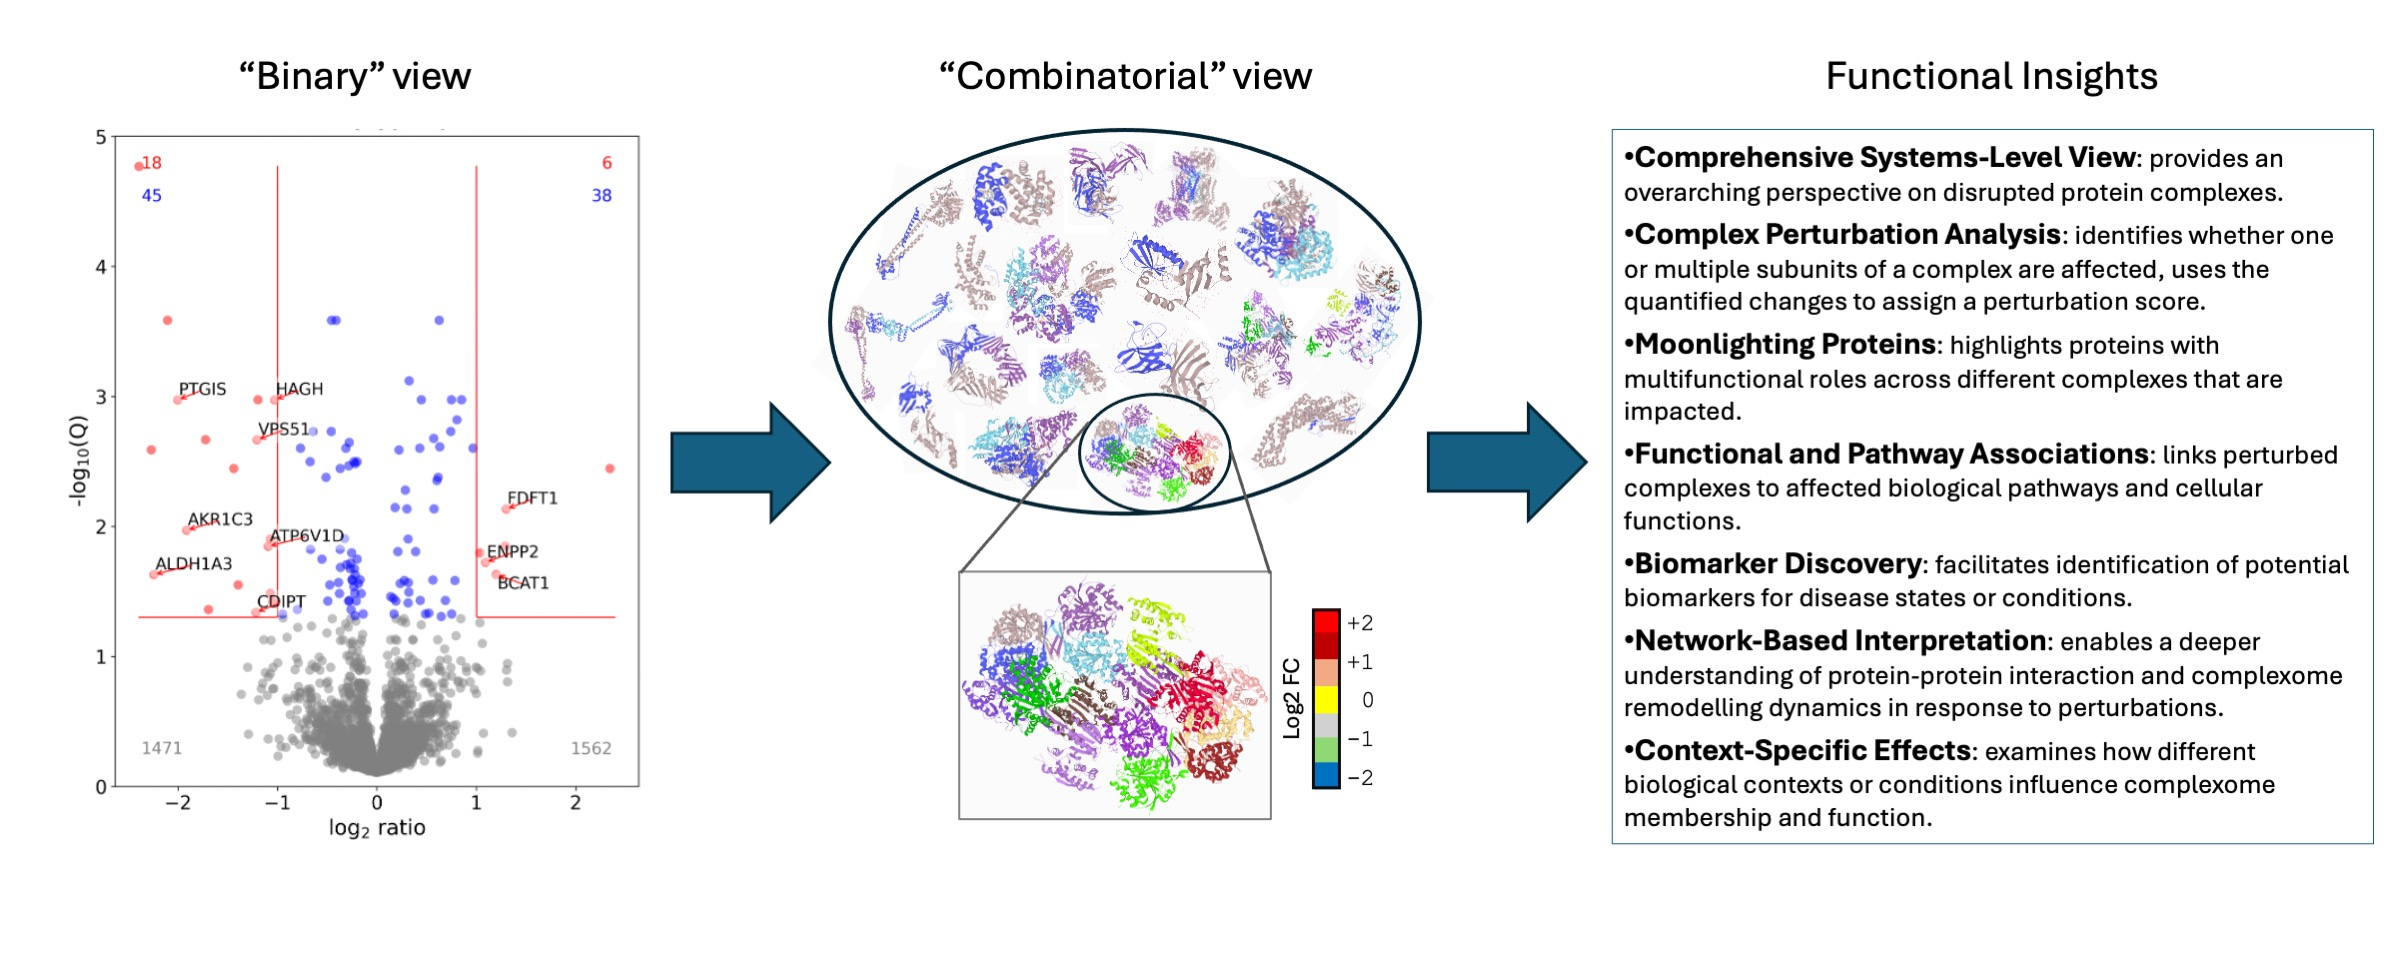

## **Step 1. User Input**: proteomics data to be analyzed.
**Information**: differential expression (log2 fold changes) and associated statistical significance values comparing two conditions A and B (e.g., sample vs control),

**Input File Type**: CSV file,

**File Format**: the file should contain the data in a 3 column format (UniProt ID, log2 fold change and adjusted p-values); separated by commas. The first line contains a header line as shown in the example below.

**Example File:** myExperiment.csv
```markdown
Protein,Log2FC,Adj.Pvalue
UniProt_id1,0.5234,0.2031
UniProt_id2,-1.3456,0.0468
UniProt_id3,0.9804,1.34E-03
UniProt_id4,0.056,0.078
....,....,....
```

In [ ]:
# @title Upload your proteomics file here:
from google.colab import files
try:
  ProteomicsDEResultsFile = files.upload()
except:
  print("There is a known problem with large files on Safari. Please try using a different browser.")

## **Step 2. Parameter Selection**
1. Select the organism of interest (from the drop-down list),
2. Set the log2 fold change, and,
3. adjusted p-value thresholds to define differentially expressed proteins,
4. Set the top N (by default: 10) occurring Gene Ontology (GO) terms to be plotted.

In [ ]:
# @title Parameters
species_name = "Homo sapiens" # @param ['Homo sapiens','Mus musculus','Saccharomyces cerevisiae','Escherichia coli strain K12','Drosothila melanogaster','Arabidopsis thailiana','Caenorhabditis elegans','Rattus norvegicus','Schizosaccharomyces pombe','Gallus gallus','Bos taurus','Severe acute respitory syndrome coronavirus 2','Crotalus durissus terrificus','Severe acute respiratory syndrome coronavirus','Middle East respiratory syndrome-related coronavirus','Danio rerio','Canis lupus familiaris','Human betacoronavirus 2c EMC/2012','Xenopus laevis','Oryctolagus cuniculus','Sus scrofa','Escherichia coli','Lymnaea stagnalis','Ovis aries','Pseudomonas aeruginosa strain ATCC 15692','Tetronarce californica','Torpedo marmorata','Vibrio cholerae serotype O1 strain ATCC 39315 / El Tor Inaba N16961']
LOG2FC_THRESHOLD = 1 # @param {"type":"number","min":-5,"max":5,"step":0.5}
ADJP_THRESHOLD = 0.05 # @param {"type":"number","min":0.00001,"max":0.1,"step":0.01}
topN_GOterms_to_plot = 10 # @param {"type":"number"}

## **Step 3. Download the dataset of annotated complexes ('complexome') for the specified organism**
data source: Complex Portal, EMBL-EBI; https://www.ebi.ac.uk/complexportal/home.

In [ ]:
# @title Download the latest version of the complexome dataset
!wget https://raw.githubusercontent.com/mguharoy/Complexome/refs/heads/main/Complexome.py -O Complexome.py  >/dev/null 2>&1
!pip install matplotlib-venn  >/dev/null 2>&1

import Complexome
# Convert the species name to the taxon id here...
taxon_convert = {
    'Homo sapiens': 9606,
    'Mus musculus': 10090,
    'Saccharomyces cerevisiae': 559292,
    'Escherichia coli strain K12': 83333,
    'Drosothila melanogaster': 7227,
    'Arabidopsis thailiana': 3702,
    'Caenorhabditis elegans': 6239,
    'Rattus norvegicus': 10116,
    'Schizosaccharomyces pombe': 284812,
    'Gallus gallus': 9031,
    'Bos taurus': 9913,
    'Severe acute respitory syndrome coronavirus 2': 2697049,
    'Crotalus durissus terrificus': 8732,
    'Severe acute respiratory syndrome coronavirus': 694009,
    'Middle East respiratory syndrome-related coronavirus': 1263720,
    'Danio rerio': 7955,
    'Canis lupus familiaris': 9615,
    'Human betacoronavirus 2c EMC/2012': 1235996,
    'Xenopus laevis': 8355,
    'Oryctolagus cuniculus': 9986,
    'Sus scrofa': 9823,
    'Escherichia coli': 562,
    'Lymnaea stagnalis': 6523,
    'Ovis aries': 9940,
    'Pseudomonas aeruginosa strain ATCC 15692': 208964,
    'Tetronarce californica': 7787,
    'Torpedo marmorata': 7788,
    'Vibrio cholerae serotype O1 strain ATCC 39315 / El Tor Inaba N16961': 243277
}
c = Complexome.setup(ProteomicsDEResultsFile, str(taxon_convert.get(species_name, 9606)))
Complexome.summary_statistics(c)

## **Step 4. Visualize summary statistics** on the downloaded complexome dataset and the uploaded proteomics data.

In [ ]:
# @title Subunit size distribution (*left*) and shared subunit membership (*right*) across complexes.
import matplotlib.pyplot as plt
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 6))
Complexome.proteins_only(c, ax1)
Complexome.shared_protein_subunits(c, ax2)

In [ ]:
# @title Measured coverage per complex (*left*) and complexome overlap with the uploaded proteomics dataset (*right*).
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 6))
Complexome.plot_proteomics_coverage_of_complexome(c, ax1)
Complexome.plot_venn_diagram(c, ax2)

In [ ]:
# @title Differential expression analysis of the proteomics data.
Complexome.plot_volcano(c, marker_size=10, log2fc_threshold=LOG2FC_THRESHOLD, adjp_threshold=ADJP_THRESHOLD)
print("Number of quantified proteins in this dataset:", len(c.proteomics_data))

## **Step 5. Linking the differentially expressed proteins to perturbed complexes.**

In [ ]:
# @title How many complexes have one (or more) subunits that are differentially expressed (DE)?
all_perturbed_complexes = Complexome.identify_perturbed_complexes(c.complexes, c.complex_names, c.proteomics_data, LOG2FC_THRESHOLD, ADJP_THRESHOLD)
unique_perturbed_complex_ids = []
for de_subunit in all_perturbed_complexes:
  unique_perturbed_complex_ids.append(de_subunit.complex_id)
print("Number of perturbed complexes linked to the DE proteins:", len(set(unique_perturbed_complex_ids)))

In [ ]:
# @title What are the most common Gene Ontology Biological Processes linked to these perturbed complexes?
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
Complexome.plot_gene_ontology_analysis_perturbed_complexes(c, all_perturbed_complexes, topN_GOterms_to_plot, ax)

## **Step 6. Exploring details of the perturbed complexes** (those with one or more subunits that are differentially expressed based on the user-defined thresholds set above).
The following information is provided for every perturbed complex identified:

**Complex ID** and **Complex Name**,

**Coverage**: the fraction of subunits in the specified complex that have a proteomics measurement (1.0 indicates that all subunits were measured),

**Perturbation Type**: Classified into **'down-regulated'**, **'up-regulated'** or **'altered'**, if the measured subunits of the complex had log2FC values that were either all negative, all positive or mixed, respectively,

**Perturbation Score ($PS$)**: calculated using the formula

$PS = \sum_{i=1}^M |log_2FC_{i} * -log_{10}(adj. Pval_{i})|$,

**Normalized Score**: Perturbation Score ($PS$) divided by the number of unique (i.e., non-redundant) measured subunits ($M$) in that complex
$\frac{PS}{M}$, and,

finally, the details of the differentially expressed subunit(s) (its **UniProt Id**, **Gene Name** and the **Log2FC** and **Adj P-value**) for each perturbed complex are also mentioned.


In [ ]:
# @title Details of the perturbed complexes (sorted in decreasing order of coverage, by default).
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()
table_data = Complexome.format_output_table_data(c, all_perturbed_complexes, 'coverage')
df = pd.DataFrame(table_data[1:], columns = table_data[0])
df['Coverage'] = pd.to_numeric(df['Coverage'])
df['Perturbation Score'] = pd.to_numeric(df['Perturbation Score'])
df['Normalized Score'] = pd.to_numeric(df['Normalized Score'])
df['Log2FC'] = pd.to_numeric(df['Log2FC'])
df['Adj P-value'] = pd.to_numeric(df['Adj P-value'])
data_table.DataTable(df, include_index=False) #, num_rows_per_page=10)

In [ ]:
# @title Visual representation of perturbed complexes. Use the drop-down list below to select the complex(es). Protein nodes are colored by their measured log2FC values, white indicates not measured. Color scale is set using the min,max log2FC values from the uploaded dataset.
import json
from IPython.display import HTML, Javascript
import ipywidgets

the_output = ipywidgets.Output()
button_displayed = False

log2fcs = json.dumps([{"protein": protein, "log2fc": data[0]} for (protein, data) in c.proteomics_data.items()])

def show_the_complex(change: dict) -> None:
  global button_displayed
  complex_id = change.get("new")
  with the_output:
    if not button_displayed:
      display(HTML('<button id="save-image">Save image</button>'))
      button_displayed = True
    display(HTML("""
<script type="module">
import { toPng } from 'https://esm.run/html-to-image';
import { draw, drawScale } from "https://cdn.jsdelivr.net/gh/mguharoy/Complexome/viewer.js";
document.querySelector("#my-complex-viewer")?.remove();
const output = document.createElement("div");
output.setAttribute("id", "my-complex-viewer")
document.querySelector("#output-area")?.appendChild(output);
const saveButton = document.querySelector("#save-image");
function saveImage(node, name) {
  toPng(node).then((url) => {
    let a = document.createElement("a");
    a.setAttribute("download", `${name}.png`);
    a.setAttribute("href", url);
    a.click();
  });
}
const width = document.querySelector("html")?.getBoundingClientRect().width;
    """
    + f"await draw(output, '{complex_id}', {log2fcs}, width, 600);"
    + f"output.appendChild(drawScale({log2fcs}));"
    + 'saveButton.addEventListener("click", () => {'
    + f'saveImage(document.querySelector("html"), "{complex_id}");'
    '});'
    + "</script>"
    ))

complex_options = ipywidgets.Dropdown(options=[""] + sorted({info.complex_id for info in all_perturbed_complexes}))
complex_options.observe(show_the_complex, names='value')
display(complex_options)
display(the_output)